## Again we are following along a Youtube tutorial. 

In [85]:
# First we downlaod the model. 140 Million Params compared to our previous model. 

vgg16 = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 19s 0us/step


In [86]:
# Let us examine the model. 

vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [89]:
# Convert VGG16 into a sequential model. Keep the model except the last classification layer. 

model = Sequential()
for layer in vgg16.layers[:-1]:
    model.add(layer)

In [90]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [91]:
# We freeze the model that we have so that only the last layer that we will create is the only thing that gets updated.

for layer in model.layers:
    layer.trainable = False

In [94]:
# Now we add the final layer for the cats and dogs dataset we are working with. 

model.add(Dense(units = 2, activation= 'softmax'))

In [101]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [103]:
# Now we train our model.

model.compile(optimizer= Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [104]:
# Fit the model on the data. best model is 98.5 % accurate, alot better than our previous model. 

model.fit(x = train_batches, validation_data=valid_batches, epochs = 5, verbose = 2)

Epoch 1/5
100/100 - 311s - loss: 0.2444 - acc: 0.8970 - val_loss: 0.0888 - val_acc: 0.9750
Epoch 2/5
100/100 - 311s - loss: 0.0761 - acc: 0.9720 - val_loss: 0.0623 - val_acc: 0.9750
Epoch 3/5
100/100 - 310s - loss: 0.0479 - acc: 0.9820 - val_loss: 0.0500 - val_acc: 0.9750
Epoch 4/5
100/100 - 309s - loss: 0.0323 - acc: 0.9900 - val_loss: 0.0423 - val_acc: 0.9800
Epoch 5/5
100/100 - 315s - loss: 0.0242 - acc: 0.9950 - val_loss: 0.0348 - val_acc: 0.9850


## Now we make predictions with our tuned model. 

In [105]:
# now we test our predictions 

predictions = model.predict(x = test_batches, verbose = 0)

In [106]:
# create our confusion matrix.

c_matrix = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis = -1))

Confusion matrix, without normalization
[[48  2]
 [ 0 50]]


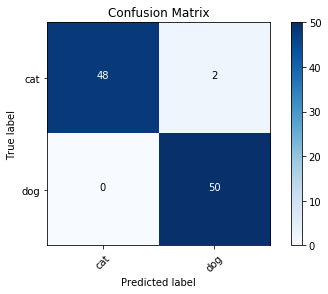

In [108]:
# Our confusion matrix is way better than our last one. Pretty much spot on. It was able to perfectly say a dog is a dog, and
# 48/50 times get that a photo of a cat was actually a cat. 

cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm = c_matrix, classes = cm_plot_labels, title = 'Confusion Matrix')